In [1]:
## Analysis
## Trend 1
## Trend 2
## Trend 3

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


city_csvpath = os.path.join('raw_data', 'city_data.csv')
ride_csvpath = os.path.join('raw_data', 'ride_data.csv')

city_df = pd.read_csv(city_csvpath)
ride_df = pd.read_csv(ride_csvpath)

city_ride_df = ride_df.merge(city_df, on='city')
city_ride_df.head(3)

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban


In [3]:
## Average Fare ($) Per City
city_grouby = city_ride_df.groupby('city')
average_fare_df = city_grouby.mean()
average_fare_df = average_fare_df[['fare']]

## Total Number of Rides Per City
city_grouby = city_ride_df.groupby('city')
total_rides = city_grouby.size()
total_rides.name = 'Total Rides'
total_rides_df = pd.DataFrame(total_rides)

# Total Number of Drivers Per City
scatter_plot_df = city_df[['city', 'driver_count', 'type']]

# merge the three objects
scatter_plot_df = scatter_plot_df.merge(average_fare_df, left_on='city', right_index=True)
scatter_plot_df = scatter_plot_df.merge(total_rides_df, left_on='city', right_index=True)
scatter_plot_df.head(3)

,city,driver_count,type,fare,Total Rides
0,Kelseyland,63,Urban,21.806429,28
1,Nguyenbury,8,Urban,25.899615,26
2,East Douglas,12,Urban,26.169091,22


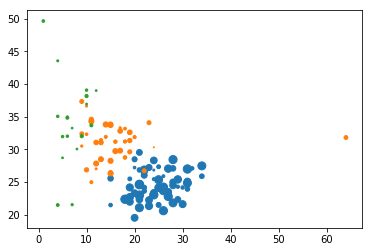

In [4]:
types = set(scatter_plot_df['type'])
for type in types:
    type_df = scatter_plot_df[scatter_plot_df['type'] == type]
    plt.scatter(type_df['Total Rides'], type_df['fare'],
                s=type_df['driver_count'])

plt.show()